# Laboratorio 4
<hr/>

# Johan Andres Mendez Macea
## 2021/09
## Requerimientos

In [342]:
!pip3 install numpy;
!pip3 install itertools;
!pip3 install pandas;
!pip3 install matplotlib;

ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools


<hr/>

# Punto 1
## Monte Carlos simulations

In [343]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

## Simulador de dado 1-100

In [344]:
def dado():
# Thankyou=[x for x in prueba1 if 'Thank you' in x]
    aleatorio=np.random.randint(1,100)
    if aleatorio >=52 and aleatorio<=100:
        return True
    else:
        return False
tiro=dado()
print(F"El tiro salio: {tiro}")


El tiro salio: True


## Simulador de N numero de apuestas

Text(0, 0.5, 'Dinero')

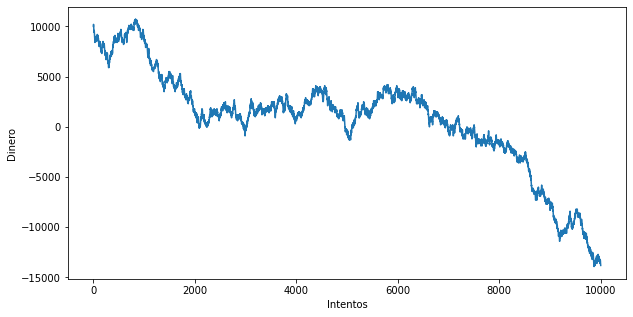

In [345]:
def Apuesta(dinero:int,intentos:int):
    copiadinero=dinero+0
    intento=[dinero]
    for x in range(intentos):
        nuevodado=dado()
        if nuevodado==True:
            copiadinero=copiadinero+100
            nuevalista=[copiadinero]
            intento=intento+nuevalista
        else:
            copiadinero=copiadinero-100
            nuevalista=[copiadinero]
            intento=intento+nuevalista

    return intento

Juego=Apuesta(10000,10000)
fig,ax=plt.subplots(1,figsize=(10,5))
ax.plot(Juego)
ax.set_xlabel("Intentos") 
ax.set_ylabel("Dinero")

## Conclusiones


Como se puede observar, la tendencia se inclina mas hacia la perdida por lo que no es conveniente hacer grandes cantidades de apuestas

<hr/>

# Punto 2
## Monte Carlo simulations


In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm


## Creación de tabla base

In [347]:
tabla=pd.DataFrame([[100000,88000,0.88,0.02,1760],[200000,202000,1.01,0.04,8080],[75000,90000,1.20,0.04,3600],[400000,360000,0.9,0.02,7200],[500000,350000,0.7,0.02,7000]],columns=['Sales Target','Actual Sales','Percent To Plan','Commission Rate','Commission Amount'])
tabla.index +=1
tabla1=tabla.copy()
tabla2=tabla.copy()


tabla1=tabla1.drop("Sales Target",axis=1)
tabla1

,Actual Sales,Percent To Plan,Commission Rate,Commission Amount
1,88000,0.88,0.02,1760
2,202000,1.01,0.04,8080
3,90000,1.20,0.04,3600
4,360000,0.90,0.02,7200
5,350000,0.70,0.02,7000



## Tabla Rate Schedule asignando valor segun el rango del 'Commission Rate'

In [348]:
def CommisionRate(valor:np.float64):
    if valor >=0 and valor <=0.9:
        return 0.02
    elif valor>0.9 and valor <1:
        return 0.03
    elif valor >=1:
        return 0.04

pd.DataFrame([0.02,0.03,0.04],index=["0-90%","91-99%",">=100%"],columns=["Rate Schedule"])


,Rate Schedule
0-90%,0.02
91-99%,0.03
>=100%,0.04


## Funciones generadoras de filas para simulación de Monte Carlo

In [349]:
# Creador de filas con respecto a Sales Target
def agregartablaSalesTarget(original:pd.DataFrame,tabfre:pd.DataFrame,nuevas:int):

    for x in range(6,nuevas+6):  
        columna1=np.random.choice(a=tabfre.index,p=tabfre["Probabilidad"])
        columna3=norm.rvs(size=1,loc=1,scale=0.1)[0]
        columna2=columna1*columna3
        columna4=CommisionRate(columna3)
        columna5=columna2*columna3
        original.loc[x]=[columna1,columna2,columna3,columna4,columna5]

# Creador de filas con respecto a Actual Sales
def agregartablaActualSales(original:pd.DataFrame,nuevas:int):
    valores=original["Actual Sales"].values
    for x in range(6,nuevas+6):  
        columna1=np.random.choice(a=valores)
        columna2=norm.rvs(size=1,loc=1,scale=0.1)[0]
        original.loc[x]=[columna1,columna2,np.nan,np.nan]
    original["Commission Rate"]=original["Percent To Plan"].apply(CommisionRate)
    original["Commission Amount"]=original["Actual Sales"]*original["Commission Rate"]
        


## Tabla 1000 simulaciones MC


In [350]:
agregartablaActualSales(tabla1,1000)
tabla1

,Actual Sales,Percent To Plan,Commission Rate,Commission Amount
1,88000.0,0.880000,0.02,1760.0
2,202000.0,1.010000,0.04,8080.0
3,90000.0,1.200000,0.04,3600.0
4,360000.0,0.900000,0.02,7200.0
5,350000.0,0.700000,0.02,7000.0
...,...,...,...,...
1001,360000.0,1.086264,0.04,14400.0
1002,90000.0,1.080083,0.04,3600.0
1003,90000.0,1.114533,0.04,3600.0
1004,350000.0,1.074945,0.04,14000.0


## Media y desviación estandar 'Commission Amount' 

In [351]:
descripcion1=tabla1.describe()
descripcion1=descripcion1["Commission Amount"].loc[["mean","std"]].to_frame("Commission Amount")
descripcion1

,Commission Amount
mean,7109.452736
std,4270.118657


## Grafica distribución de probabilidad normal

Media de: 7109.452736318408 ************************************************************
Desviación estandar: 4270.1186570893415 ************************************************************


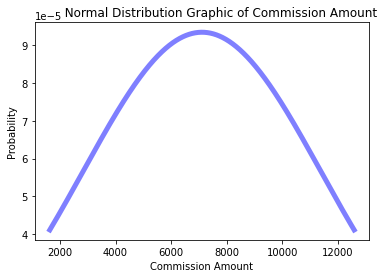

In [352]:
fig,ax=plt.subplots(1)

x=np.linspace(norm.ppf(0.1,descripcion1["Commission Amount"][0],descripcion1["Commission Amount"][1]),norm.ppf(0.9,descripcion1["Commission Amount"][0],descripcion1["Commission Amount"][1]),1000)

ax.plot(x,norm.pdf(x,descripcion1["Commission Amount"][0],descripcion1["Commission Amount"][1]),'-b',lw=5,alpha=0.5)
ax.set_xlabel("Commission Amount")
ax.set_ylabel("Probability")
ax.set_title("          Normal Distribution Graphic of Commission Amount")
print(F"Media de: {descripcion1['Commission Amount'][0]} ************************************************************")
print(F"Desviación estandar: {descripcion1['Commission Amount'][1]} ************************************************************")
plt.show()

## Creación tabla frecuencia con su probabilidad

In [353]:
tabfre=pd.DataFrame({'Frecuencia':{100000:300,200000:100,300000:63,400000:20,500000:23}})
tabfre["Probabilidad"]=tabfre["Frecuencia"]/tabfre["Frecuencia"].sum()
tabfre

,Frecuencia,Probabilidad
100000,300,0.592885
200000,100,0.197628
300000,63,0.124506
400000,20,0.039526
500000,23,0.045455


## Creacion de 500 simulaciones para Sales Target teniendo como base 5

In [354]:
agregartablaSalesTarget(tabla2,tabfre,500)
tabla2

,Sales Target,Actual Sales,Percent To Plan,Commission Rate,Commission Amount
1,100000.0,88000.000000,0.880000,0.02,1760.000000
2,200000.0,202000.000000,1.010000,0.04,8080.000000
3,75000.0,90000.000000,1.200000,0.04,3600.000000
4,400000.0,360000.000000,0.900000,0.02,7200.000000
5,500000.0,350000.000000,0.700000,0.02,7000.000000
...,...,...,...,...,...
501,100000.0,93304.549835,0.933045,0.03,87057.390199
502,200000.0,192981.576107,0.964908,0.03,186209.443583
503,100000.0,92321.008673,0.923210,0.03,85231.686424
504,300000.0,331632.071785,1.105440,0.04,366599.436788


## Promedio de 500 simulaciones en Commission Amount

In [355]:
print(F"Media: {tabla2.describe()[['Commission Amount']].loc['mean'][0]}");
descripcion2=tabla2.describe()[["Commission Amount"]].loc[["mean","std"]]
descripcion2

Media: 180422.4536051469


,Commission Amount
mean,180422.453605
std,121995.860425


## Conclusion

In [356]:
print(F"Para una distribución del 'Percent To Plant' con media=100% y desviación estandar de 10% se presupuesta las comisiones entre:"+'\n'+F"{(descripcion1['Commission Amount'][0]+descripcion2['Commission Amount'][0])/2}"+'\n'+F"con desviaciones de {(descripcion1['Commission Amount'][1]+descripcion2['Commission Amount'][1])/2}")

Para una distribución del 'Percent To Plant' con media=100% y desviación estandar de 10% se presupuesta las comisiones entre:
93765.95317073265
con desviaciones de 63132.989541236886


<hr/>

# Punto 3
## Markov Chain



In [357]:
import numpy as np
import pandas as pd
import itertools

## Muestras

In [358]:
Oraciones=['Thank you for your help', 'Thank you for all your help', 'Thank you for your assistance' ,'Best', 'Regards', 'Thanks', 'Kind regards', 'Thank you', 'Many thanks', 'Warm wishes', 'With gratitude', 'Thanks again', 'Thank you for everything' ,'Thank you for your support']
Palabras=[]
for x in Oraciones:
    for y in x.split():
        Palabras.append(y)
unicos=list(dict().fromkeys(Palabras))
unicos;


## Tabla probabilidad de inicio con X teniendo en cuenta que haya iniciado

In [359]:
principio=[]
noprincipio=[]
for x in Palabras:
    if x[0].isupper():
        principio.append(x)

for x in unicos:
    if not(x[0].isupper()):
        noprincipio.append(x)
principio
Tabla={x:principio.count(x)/len(principio) for x in principio}
Tablainicio=pd.DataFrame(Tabla,index=["Probabilidades Inicio"])
Tablainicio
mostrar=Tablainicio.copy()
mostrar['Acumulado']=pd.DataFrame(Tablainicio.sum(axis=1))
mostrar
# pd.DataFrame(Tablainicio.sum(axis=1))


,Thank,Best,Regards,Thanks,Kind,Many,Warm,With,Acumulado
Probabilidades Inicio,0.428571,0.071429,0.071429,0.142857,0.071429,0.071429,0.071429,0.071429,1.0


## Combinatoria para generar cada par de palabras posible

In [360]:
auxiliar=list(Tabla.keys())+noprincipio
transicion=pd.DataFrame(index=auxiliar,columns=noprincipio+[''])
transicion.shape
posibilidadesnorden=[]
for a in Oraciones:
    for c in itertools.combinations(a.split(),2):
        if c not in posibilidadesnorden:
             posibilidadesnorden.append(c)
posibilidadorden={x:posibilidadesnorden.count(x) for x in posibilidadesnorden}
posibilidadorden=np.unique(posibilidadorden)
# posibilidadorden.sort(0)
posibilidadorden=list(posibilidadorden[0])
posibilidadorden.sort()
posibilidadorden=np.asarray(posibilidadorden)
posibilidadorden

array([['Kind', 'regards'],
       ['Many', 'thanks'],
       ['Thank', 'all'],
       ['Thank', 'assistance'],
       ['Thank', 'everything'],
       ['Thank', 'for'],
       ['Thank', 'help'],
       ['Thank', 'support'],
       ['Thank', 'you'],
       ['Thank', 'your'],
       ['Thanks', 'again'],
       ['Warm', 'wishes'],
       ['With', 'gratitude'],
       ['all', 'help'],
       ['all', 'your'],
       ['for', 'all'],
       ['for', 'assistance'],
       ['for', 'everything'],
       ['for', 'help'],
       ['for', 'support'],
       ['for', 'your'],
       ['you', 'all'],
       ['you', 'assistance'],
       ['you', 'everything'],
       ['you', 'for'],
       ['you', 'help'],
       ['you', 'support'],
       ['you', 'your'],
       ['your', 'assistance'],
       ['your', 'help'],
       ['your', 'support']], dtype='<U10')

## Funciones generadoras de diccionarios para la probabilidad de pasar a la siguiente palabra estando en una palabra

In [361]:
def palabrasiguiente(Todos:np.ndarray,palabra:str,oraciones:list):
    listapersonal=np.asarray([[palabra,""]])
    for x in Todos:
        if palabra in x:
            listapersonal=np.concatenate((listapersonal,[x]))
    print(type(listapersonal[0][1]))
    exito=np.empty(shape=0,dtype=list)
    contador=0
    diccionario={palabra:{}}
    diccionario[palabra][' ']=0
    for x in Oraciones:
        if x.split()[len(x.split())-1]==palabra:
            diccionario[palabra][' ']+=1
            contador+=1
        for a in listapersonal[1:]:
            if ''.join(a)  in x.replace(" ","") and a[1]!=palabra :
                contador+=1
                exito=np.append(exito,a[1])
                diccionario[palabra][a[1]]=list(exito).count(a[1])
    for sum in diccionario[palabra]:
        diccionario[palabra][sum]=diccionario[palabra][sum]=diccionario[palabra][sum]/contador
    return diccionario

def todaposibilidad(posibilidades:np.ndarray,lista:list,ora:list)->dict:     
    return {x:list(palabrasiguiente(posibilidadorden,x,ora).values())[0] for x in lista}


<class 'numpy.str_'>


{'gratitude': {' ': 1.0}}

## Tabla de transicion

In [362]:
posibilidad=todaposibilidad(posibilidadorden,unicos,Oraciones)
TablaFinal=pd.DataFrame(posibilidad).transpose()
TablaFinal=TablaFinal.fillna(0)
TablaFinal

<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>


,,you,for,your,all,everything,help,assistance,support,again,regards,thanks,wishes,gratitude
Thank,0.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
you,0.166667,0.0,0.833333,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
for,0.000000,0.0,0.000000,0.6,0.2,0.2,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
your,0.000000,0.0,0.000000,0.0,0.0,0.0,0.5,0.25,0.25,0.0,0.0,0.0,0.0,0.0
help,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
all,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
assistance,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
Best,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
Regards,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
Thanks,0.500000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.5,0.0,0.0,0.0,0.0


<font size=4>Los índices de la tabla son las palabras que ahora mismo estan a punto de decidir a su sucesor, las columnas son las probabilidad de que sea el sucesor dado un índice<font>

## Comprobación de la tabla de transiciones
<font size=3>Para asegurarnos de que sea correcta tenemos que sumar las probabilidades de cada columna con respecto a una fila y esperar que de 1

In [363]:
TablaFinal.sum(axis=1).to_frame("Sumatoria de todas las probabilidades columna")


,Sumatoria de todas las probabilidades columna
Thank,1.0
you,1.0
for,1.0
your,1.0
help,1.0
all,1.0
assistance,1.0
Best,1.0
Regards,1.0
Thanks,1.0


<font size=4>Como se aprecia en la tabla cada palabra llena la probabilidad de 1 por lo que todas las probabilidades estan satisfechas


## Función generar frases

In [364]:
## Funcion generar frase
def generarFrase(transicion:pd.DataFrame,inicio:dict):
    concatenado=str(np.random.choice(list(inicio.keys()),1,p=[inicio[x]['Probabilidades Inicio'] for x in inicio])[0])
    cambio=concatenado
    while True:
        auxiliar=list(transicion[concatenado.split()[len(concatenado.split())-1]].keys())
        auxiliar2=list(transicion[concatenado.split()[len(concatenado.split())-1]].values())
        ale=str(np.random.choice(a=auxiliar,p=auxiliar2))
        if ale!=' ':
            concatenado=concatenado+' '+ale
        else:
            break
    return concatenado

def Nfrases(transicion:pd.DataFrame,inicio:dict,veces:int):
    resultados=[generarFrase(transicion,inicio) for x in range(veces)]
    return resultados

    
intentos=5000
prueba1=Nfrases(posibilidad,Tablainicio.to_dict(),intentos)
prueba1


['Thank you for your help',
 'Warm wishes',
 'Regards',
 'Thanks',
 'Thank you',
 'Regards',
 'Best',
 'Thank you for all your assistance',
 'With gratitude',
 'Thank you for your help',
 'With gratitude',
 'Warm wishes',
 'Thank you for all your support',
 'Thank you for your assistance',
 'Thank you for your help',
 'Thank you',
 'With gratitude',
 'Thank you for all your help',
 'Best',
 'Thank you for your help',
 'Kind regards',
 'Thank you for your help',
 'Thank you',
 'Many thanks',
 'Thank you for your support',
 'Kind regards',
 'Thanks again',
 'Best',
 'Kind regards',
 'Thanks again',
 'Thank you for your help',
 'Many thanks',
 'Thank you for your assistance',
 'Thanks',
 'Thank you for your help',
 'Thanks again',
 'Thank you',
 'Thank you for your help',
 'Regards',
 'Best',
 'Thank you for everything',
 'Kind regards',
 'Thank you for your assistance',
 'Thank you for everything',
 'Warm wishes',
 'Thank you for your assistance',
 'Thanks again',
 'Thanks',
 'Thank you 

<font size=4> Se han generado 5000 pruebas, ahora buscaremos las frases que se generaron con "Thanks" y "Thank you" entonces sacaremos sus probabilidades de ocurrencia


## Frases generadas con las cadenas 'Thanks' y 'Thank you' con su probabilidad

In [365]:
Thanks=[x for x in prueba1 if 'Thanks' in x ]
Thankyou=[x for x in prueba1 if 'Thank you' in x]
print(F"Coincidencias con 'Thanks': {len(Thanks)}")
print(F"Coincidencias con 'Thank you': {len(Thankyou)}")
print(F"Intentos: {intentos}")
print(F"Probabilidad de que se genere una oración con 'Thanks': {len(Thanks)/intentos}")
print(F"Probabilidad de que dado 'Thank' su sucesor sea 'you': {TablaFinal['you']['Thank']*100}% ")
print(F"Probabilidad de que se genere una oración con 'Thank you': {len(Thankyou)/intentos}"+'\n')
print('Recordando la tabla inicial de probabilidades en el inicio podemos ver la similitud')
Tablainicio

Coincidencias con 'Thanks': 745
Coincidencias con 'Thank you': 2159
Intentos: 5000
Probabilidad de que se genere una oración con 'Thanks': 0.149
Probabilidad de que dado 'Thank' su sucesor sea 'you': 100.0% 
Probabilidad de que se genere una oración con 'Thank you': 0.4318

Recordando la tabla inicial de probabilidades en el inicio podemos ver la similitud


,Thank,Best,Regards,Thanks,Kind,Many,Warm,With
Probabilidades Inicio,0.428571,0.071429,0.071429,0.142857,0.071429,0.071429,0.071429,0.071429


<hr/>

# Punto 4 